<a href="https://colab.research.google.com/github/eranCat/AntsColonyOptimization-find-friends/blob/main/ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# Import necessary libraries
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import time
import json
import csv

[Dummy data generator](https://www.mockaroo.com/)

In [71]:
def aco(graph, start_vertex, end_vertex, num_ants, num_iterations, evaporation_rate, alpha, beta):
    node_indices = {node: i for i, node in enumerate(graph.nodes)}
    num_vertices = len(graph.nodes)
    pheromone_matrix = np.ones((num_vertices, num_vertices))

    best_path = None
    best_path_length = float('inf')

    for _ in range(num_iterations):
        ant_paths = []
        for _ in range(num_ants):
            path = [start_vertex]
            current_vertex = start_vertex

            while current_vertex != end_vertex:
                neighbors = list(graph.neighbors(current_vertex))
                neighbors = [n for n in neighbors if n not in path]

                if not neighbors:
                    break

                probabilities = []
                total_probability = 0
                for neighbor in neighbors:
                    pheromone = pheromone_matrix[node_indices[current_vertex]][node_indices[neighbor]]
                    heuristic = 1  # Replace with your own heuristic calculation
                    probability = (pheromone ** alpha) * (heuristic ** beta)
                    probabilities.append(probability)
                    total_probability += probability

                probabilities = [p / total_probability for p in probabilities]
                next_vertex = random.choices(neighbors, weights=probabilities)[0]
                path.append(next_vertex)
                current_vertex = next_vertex

            ant_paths.append(path)

        # Update pheromone matrix
        pheromone_matrix *= (1 - evaporation_rate)

        for path in ant_paths:
            path_length = len(path) - 1
            for i in range(len(path) - 1):
                vertex1 = node_indices[path[i]]
                vertex2 = node_indices[path[i + 1]]
                pheromone_matrix[vertex1][vertex2] += 1 / path_length
                pheromone_matrix[vertex2][vertex1] += 1 / path_length

            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

    return best_path

def compare_runtimes(num_vertices_range, num_trials=5, num_ants=10, num_iterations=100, evaporation_rate=0.1, alpha=1, beta=2):
    aco_times = []
    bfs_times = []

    for num_vertices in num_vertices_range:
        aco_trial_times = []
        bfs_trial_times = []

        for _ in range(num_trials):
            # Generate a random graph
            graph = [[1.0] * num_vertices for _ in range(num_vertices)]
            start = 0
            end = random.randint(1, num_vertices - 1)

            # Time ACO
            start_time = time.time()
            aco_path = aco(graph, start, end, num_ants, num_iterations, evaporation_rate, alpha, beta)
            aco_trial_times.append(time.time() - start_time)

            # Time BFS using NetworkX
            start_time = time.time()
            try:
                bfs_path = nx.shortest_path(graph, source=start, target=end)
            except nx.NetworkXNoPath:
                bfs_path = None
            bfs_trial_times.append(time.time() - start_time)

        aco_times.append(np.mean(aco_trial_times))
        bfs_times.append(np.mean(bfs_trial_times))

    return aco_times, bfs_times

In [72]:
def read_people_from_csv(csv_filename):
    """Reads people's data from a CSV file and returns a list of people."""
    people = []
    with open(csv_filename, mode='r', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            person = {
                "id": int(row["id"]),
                "first_name": row["first_name"],
                "last_name": row["last_name"],
                "email": row["email"],
                "gender": row["gender"]
            }
            people.append(person)
    return people

def generate_friends(total_people, min_friends, max_friends):
    """Generates a dictionary of friends for each person."""
    friends_dict = {person["id"]: [] for person in total_people}
    for person in total_people:
        person_id = person["id"]
        num_friends = random.randint(min_friends, max_friends)  # Each person can have between `min_friends` and `max_friends` friends
        friends = random.sample([p["id"] for p in total_people if p["id"] != person_id], num_friends)
        friends_dict[person_id] = friends
    return friends_dict

def create_people_with_friends(csv_filename):
    """Creates a list of people with friend connections from a CSV file."""
    # Read people from CSV
    people = read_people_from_csv(csv_filename)

    # Generate friends for each person
    friends_dict = generate_friends(people,1, 3)

    # Add friends to each person's data
    for person in people:
        person["friends"] = friends_dict[person["id"]]

    return people

# Path to the CSV file
csv_filename = '/content/sample_data/MOCK_DATA_people.csv'

# Create people with friends
people_with_friends = create_people_with_friends(csv_filename)

# Save the data to a JSON file
with open('people_friends.json', 'w') as f:
    json.dump(people_with_friends, f, indent=4)

# Print the first 10 entries to verify
for person in people_with_friends[:10]:
    print(person)


{'id': 1, 'first_name': 'Melba', 'last_name': 'Garric', 'email': 'mgarric0@goo.ne.jp', 'gender': 'Genderqueer', 'friends': [265, 244, 823]}
{'id': 2, 'first_name': 'Zebadiah', 'last_name': 'Caldicott', 'email': 'zcaldicott1@who.int', 'gender': 'Male', 'friends': [128]}
{'id': 3, 'first_name': 'Ulick', 'last_name': 'Karran', 'email': 'ukarran2@last.fm', 'gender': 'Male', 'friends': [198, 21]}
{'id': 4, 'first_name': 'Broderick', 'last_name': 'Henrych', 'email': 'bhenrych3@amazonaws.com', 'gender': 'Male', 'friends': [781, 847, 449]}
{'id': 5, 'first_name': 'Levi', 'last_name': 'Paske', 'email': 'lpaske4@cdc.gov', 'gender': 'Male', 'friends': [626]}
{'id': 6, 'first_name': 'Dina', 'last_name': 'Tomenson', 'email': 'dtomenson5@devhub.com', 'gender': 'Female', 'friends': [980]}
{'id': 7, 'first_name': 'Daryle', 'last_name': 'Fairlem', 'email': 'dfairlem6@addthis.com', 'gender': 'Male', 'friends': [259, 211]}
{'id': 8, 'first_name': 'Neddie', 'last_name': 'Durnian', 'email': 'ndurnian7@noaa

In [83]:
def create_graph_from_friends(people, max_people=None):
    """Creates a NetworkX graph from the list of people with friends, limited by max_people."""
    G = nx.Graph()

    # Limit the number of people for the graph
    if max_people is not None:
        people = people[:max_people]

    # Add nodes with attributes
    for person in people:
        G.add_node(person["id"], first_name=person["first_name"], last_name=person["last_name"],
                   email=person["email"], gender=person["gender"])

    # Add edges based on friends
    for person in people:
        for friend_id in person["friends"]:
            if friend_id in G.nodes:  # Ensure the friend is also in the graph
                G.add_edge(person["id"], friend_id)

    return G

def visualizeGraph(graph,spread):
    # Set figure size
    plt.figure(figsize=(12, 8))  # Adjust these values as needed

    # Define node positions for better layout (optional)
    pos = nx.spring_layout(graph, k=spread)  # Adjust 'k' and 'iterations' for spreading out the nodes

    # Draw the graph with adjusted parameters
    nx.draw(graph, pos, with_labels=True, node_size=200, font_size=12, font_color='white', node_color='blue')  # Adjust node_size and font_size as needed
    plt.show()

In [84]:
# Number of people
num_people = 1000

graph = create_graph_from_friends(people_with_friends,num_people)

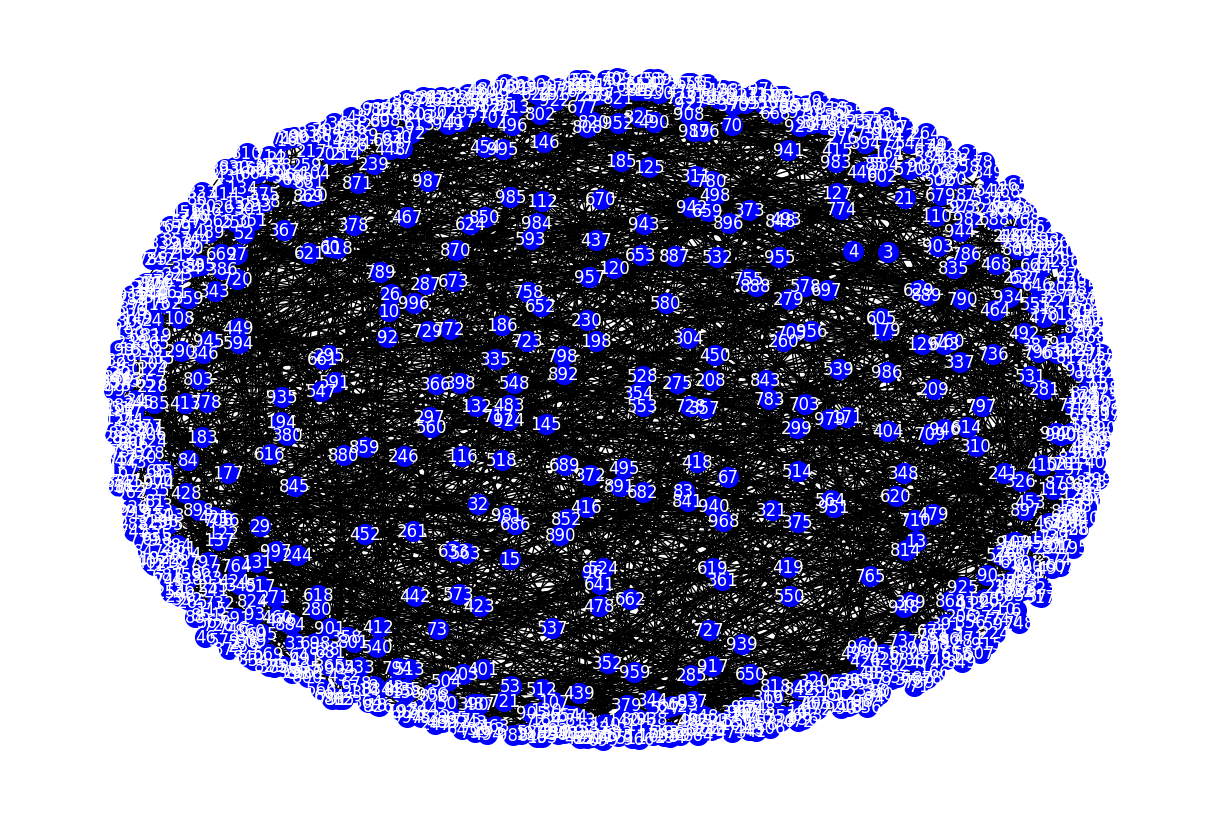

In [85]:
visualizeGraph(graph,0.8)

In [86]:
start_user = 1
end_user = random.randint(2, num_people)
shortest_path = aco(graph, start_user, end_user, num_ants=10, num_iterations=100, evaporation_rate=0.1, alpha=1, beta=2)
print(f"Shortest path from user {start_user} to user {end_user}: {shortest_path}")

Shortest path from user 1 to user 409: [1, 34, 781, 75, 159]


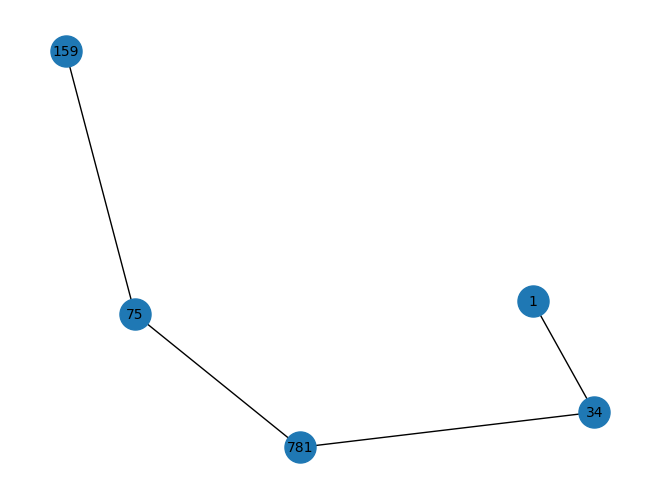

In [87]:
def visualize_path_only(graph, path):
    """Visualizes only the given path of the graph."""

    pos = nx.spring_layout(graph)  # You can experiment with other layout algorithms

    # Create a subgraph containing only the nodes and edges in the path
    path_graph = graph.subgraph(path)

    # Draw the path graph with labels
    nx.draw(path_graph, pos, with_labels=True, node_size=500, font_size=10)

    plt.show()

visualize_path_only(graph, shortest_path)

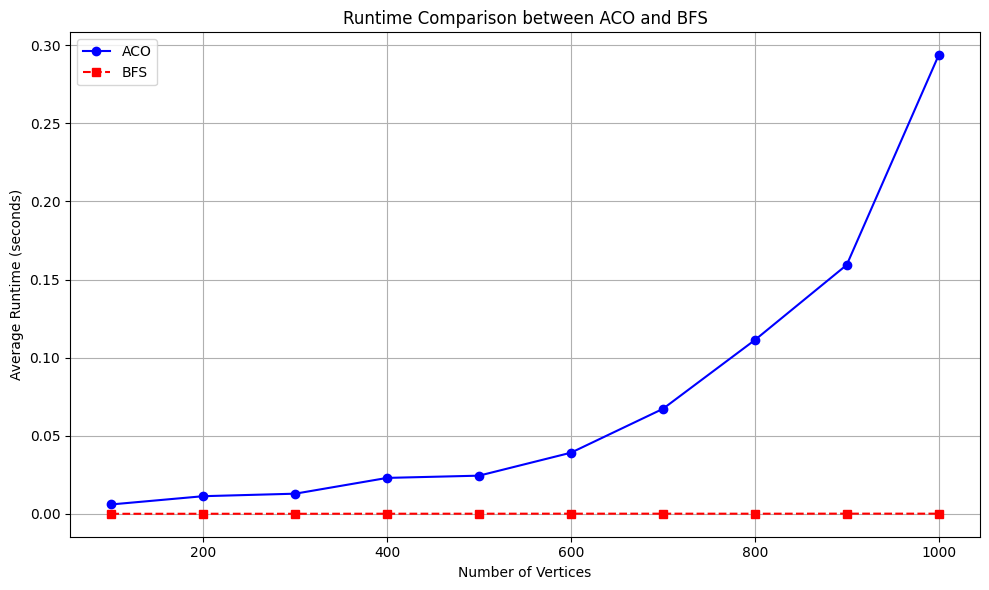

In [88]:
def compare_runtimes(num_vertices_range, num_trials=5, num_ants=10, num_iterations=100, evaporation_rate=0.1, alpha=1, beta=2):
    aco_times = []
    bfs_times = []

    for num_vertices in num_vertices_range:
        aco_trial_times = []
        bfs_trial_times = []

        for _ in range(num_trials):
            # Generate a random graph
            graph = create_graph_from_friends(people_with_friends, num_vertices)

            start = random.randint(1, num_vertices)
            end = random.randint(1, num_vertices)
            while start == end:
                end = random.randint(1, num_vertices)

            # Time ACO
            start_time = time.time()
            aco_path = aco(graph, start, end, num_ants, num_iterations, evaporation_rate, alpha, beta)
            aco_trial_times.append(time.time() - start_time)

            # Time BFS using NetworkX
            start_time = time.time()
            try:
                bfs_path = nx.shortest_path(graph, source=start, target=end)
            except nx.NetworkXNoPath:
                bfs_path = None
            bfs_trial_times.append(time.time() - start_time)

        aco_times.append(np.mean(aco_trial_times))
        bfs_times.append(np.mean(bfs_trial_times))

    return aco_times, bfs_times

def plot_runtime_comparison(num_vertices_range, aco_times, bfs_times):
    plt.figure(figsize=(10, 6))
    plt.plot(num_vertices_range, aco_times, marker='o', linestyle='-', color='b', label='ACO')
    plt.plot(num_vertices_range, bfs_times, marker='s', linestyle='--', color='r', label='BFS')
    plt.xlabel('Number of Vertices')
    plt.ylabel('Average Runtime (seconds)')
    plt.title('Runtime Comparison between ACO and BFS')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

num_vertices_range = range(100, 1001, 100)  # Test for graphs with 100 to 1000 vertices
aco_times, bfs_times = compare_runtimes(num_vertices_range)

# Plot the runtime comparison
plot_runtime_comparison(num_vertices_range, aco_times, bfs_times)